In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
housing=pd.read_csv("Housing.csv")

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
dtypes: int64(12)
memory usage: 51.2 KB


In [5]:
housing['airconditioning'].value_counts()

airconditioning
0    373
1    172
Name: count, dtype: int64

In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>],
       [<Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'hotwaterheating'}>],
       [<Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>]], dtype=object)

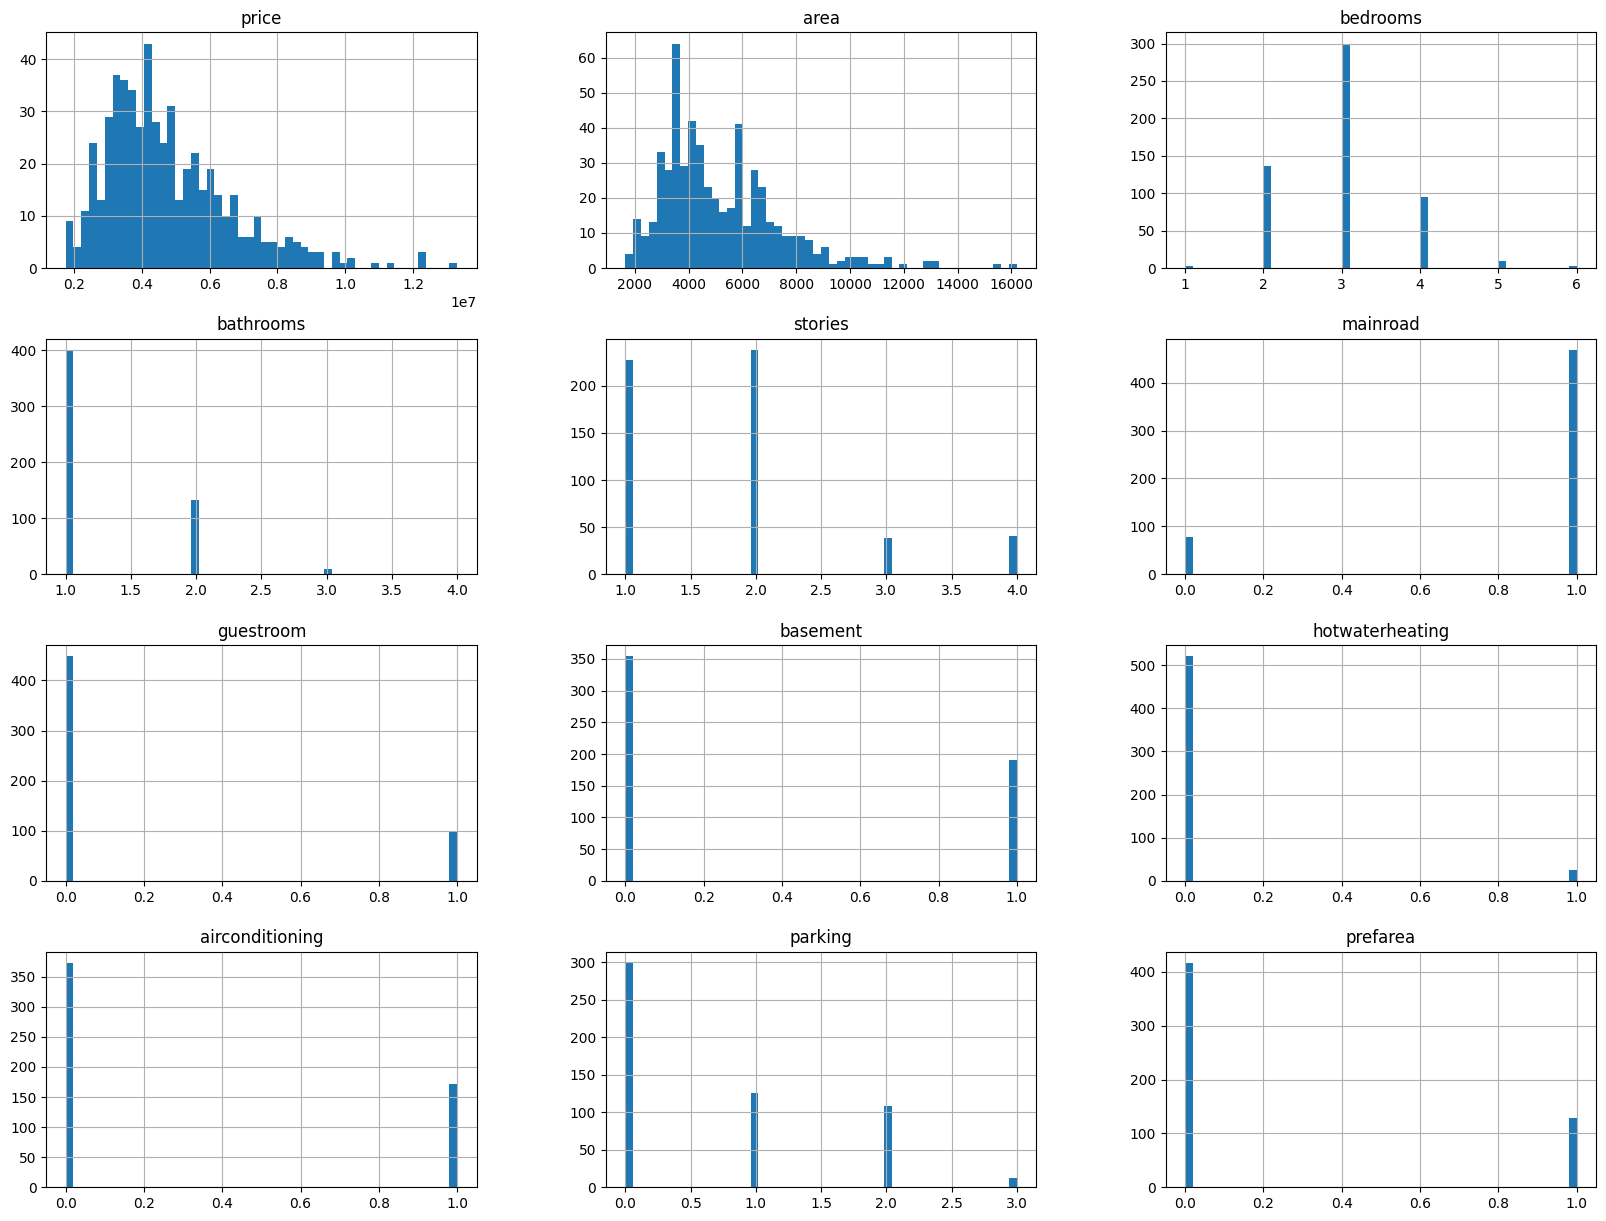

In [7]:
housing.hist(bins=50,figsize=(20,15))

In [8]:
# Create combined key for stratification
housing['strat_key'] = housing['airconditioning'].astype(str) + '_' + housing['basement'].astype(str)

# Perform stratified split
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing, housing['strat_key']):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]

# Show individual value proportions in test set
print("Test set 'airconditioning' distribution:")
print(strat_test_set['airconditioning'].value_counts())

print("\nTest set 'basement' distribution:")
print(strat_test_set['basement'].value_counts())

# # Show combined key proportions in full and test sets
# print("\nCombined key distribution in full dataset:")
# print((housing['airconditioning'].astype(str) + '_' + housing['basement'].astype(str)).value_counts(normalize=True))

# print("\nCombined key distribution in test set:")
# print((strat_test_set['airconditioning'].astype(str) + '_' + strat_test_set['basement'].astype(str)).value_counts(normalize=True))

# # Optional: drop helper column
# housing.drop('strat_key', axis=1, inplace=True)


Test set 'airconditioning' distribution:
airconditioning
0    75
1    34
Name: count, dtype: int64

Test set 'basement' distribution:
basement
0    71
1    38
Name: count, dtype: int64


In [9]:
corr_matrix=housing.corr()
corr_matrix['price'].sort_values(ascending=False)

price              1.000000
area               0.535997
bathrooms          0.517545
strat_key          0.467446
airconditioning    0.452954
stories            0.420712
parking            0.384394
bedrooms           0.366494
prefarea           0.329777
mainroad           0.296898
guestroom          0.255517
basement           0.187057
hotwaterheating    0.093073
Name: price, dtype: float64

#attribute combination

In [10]:
housing["new"]=housing['guestroom']/housing['basement']

In [11]:
housing = strat_train_set.drop("area",axis=1)
housing_labels=strat_train_set['area'].copy() 
# to differ features and labels

#HAndling missing values

In [12]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [13]:
x=imputer.transform(housing)
housing_tr=pd.DataFrame(x,columns=housing.columns)
# housing_tr.describe()

In [14]:
# creating a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
my_pipeline= Pipeline([
    #...add as many as you want
    ('std_scaler',MinMaxScaler())
])

In [15]:
housing_num_tr=my_pipeline.fit_transform(housing_tr)
# housing_num_tr


In [16]:
housing_num_tr.shape

(436, 12)

#selcting desired model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [18]:
some_data=housing_tr.iloc[:300]

In [19]:
some_labels=housing_labels

In [20]:
prepared_data=my_pipeline.transform(some_data)

In [25]:
model.predict(prepared_data)
list(some_labels)
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_mse

32006.346330275228